In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import create_coherent_state
from core import time_evo
from core import time_evo_new
from core import time_evo_from_state
from core import load_param
from core import load_H_list
from core import load_result
from core import load_tlist
from core import operators
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from core import annihilation_operator
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.distribution_gif import prob_gif
from utils.distribution_gif import gif_distrib_H_s_int
from utils.distribution_gif import gif_distrib_system_first_eig
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.basic_functions import random_dephasing
from utils.basic_functions import get_state_probabilities
from utils.basic_functions import position
from utils.basic_functions import random_dephasing_energy_basis
from utils.basic_functions import copy_cat
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians




<img src="outputs/temp/unitary_fund_logo.png" width="500"> <img src="outputs/temp/ACL.png" width="361">


<h1>The 3 regimes of the ACL model<h1>

<h1>The ACL model in the litterature<h1>

<h3> A. Albrecht,  R. Baunach and A. Arrasmith, "Adapted Caldeira-Leggett Model"<h3>

<h3>-Studying the limits of einselection <h3>

The pointer states of various decoherence models depend on the "regime" in which the quantum measurement is made, such as the quantum measurement limit ($E_s$ dominated).

<h3>-Loschmidt echo<h3>

<h3>R. Baunach, A. Albrecht, and A. Arrasmith, “Copycat process in the early stages of einselection”<h3>

<h3>-The copy-cat process<h3>

Process, whereby for an initially pure quantum state, the second eigenstate of the ACL model copies the first eigenstate. Note that the second eigenstate starts as machine error due to our systems starting as a pure state.

The times are specifically choosen to lineup their positions in the oscillations

In [ ]:
file_name = "coherent_state_decoherence"
info = list(load_param(file_name))
H_list=load_H_list(file_name)
d1=info[0]
result=load_result(file_name)
tlist=load_tlist(file_name)

copy_cat(d1,result,H_list,tlist,1,5,34)

<h3>-Equilibriation, thermalization and relation to dehaphasing<h3>

As we can see, in both of these cases, after a certain time, the energies between the system and environment balance and reach an equilibirum value, martching the time at which entropy is highest. 

/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


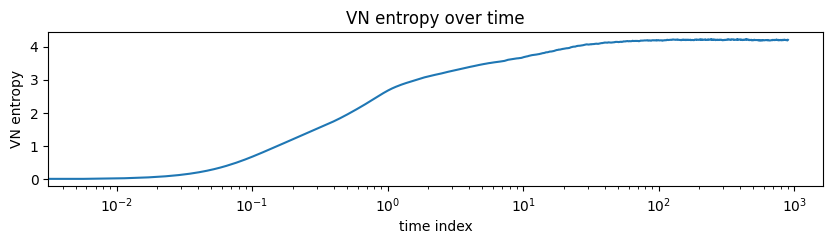

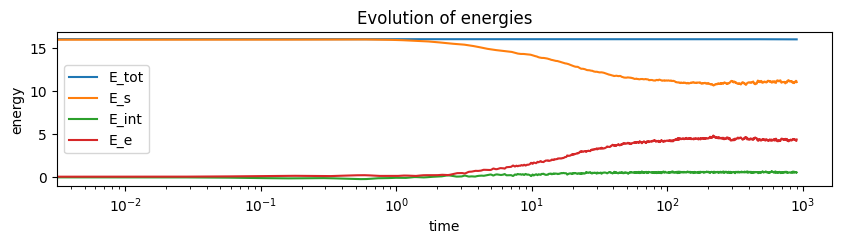

In [ ]:
file_name="ACL_eq_4_extended"
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)
plot_VN(result,tlist,1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, tlist)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.title("Evolution of energies")
plt.xlabel("time")
plt.ylabel("energy")
plt.show()

In [10]:
coherent_state_init=result.states[0]

state_rd_dephase=random_dephasing(coherent_state_init)

[E_tot,E_s,E_int,E_e]=exp_val(state_rd_dephase, H_list)

print([E_tot,E_s,E_int,E_e])

H=H_list[1]
eigenenergies,eigenstates=H.eigenstates()

dephased_in_ener=random_dephasing_energy_basis(coherent_state_init,H_list)
dephased_state=dephased_in_ener[-1][0]*eigenstates[-1]
d=d1*d2
for i in range(d-1):
    dephased_state=dephased_state+dephased_in_ener[i][0]*eigenstates[i]
exp=exp_val(dephased_state,H_list)

print(exp)

densi=dephased_state*dephased_state.dag()
density_matrix = qt.ptrace(densi, [0])  # Calculate the density matrix at the specified time
entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))

print(entropy)

[(15.943950433877971-5.551115123125783e-17j), (16+0j), 0j, (-0.05604956612202869-5.551115123125783e-17j)]
[(16.06977869663241+0j), (11.271378000843207-4.163336342344337e-17j), (0.5440871391281219+1.0408340855860843e-17j), (4.254313556661092-6.938893903907228e-18j)]
0.9999999999940318
(4.198318830785418-3.890513967886356e-17j)


Note that Andreas Albrecht has studied the abscence of thermalization in the presence of equilibriation in the ACL model. ie, for different initial states of the same energy, we have different equilibriums in the energy balance of $E_s$ and $E_e$.


<h1>More subjects studied with the ACl model: <h1>

<h3> 

**Preferred basis problem** (Arsalan Adil, Manuel S. Rudolph, Andrew Arrasmith, Zoë Holmes, Andreas Albrecht et al. "A Search for Classical Subsystems in Quantum Worlds" (Mar 16, 2024))

**Envariance,quantum darwinism** (Wojciech Hubert Zurek, "Quantum Theory of the Classical: Einselection, Envariance, Quantum Darwinism and Extantons" (Aug 18, 2022))

**Cosmology, Arrow of time, emergence of classical from quantum** (Andreas Albrecht, Rose Baunach, Andrew Arrasmith,"Einselection, equilibrium, and cosmology" (May 28, 2021))
<h3>

<h1>Current research with Andreas Albrecht and Zoe Holmes<h1>

In [ ]:
#reserarch on equilibrium properties. how does dephasing a little in different basis get you closer to equilibrium? is there a basis getting you there for less dephasing? 
#Do we see that dephasing in a basis that is not the. energy eigenbasis not give you equilibrium?

#research on energy splittting. I need to study the energy splitting for the coherent state.
#Can we get it all from the energy spectrum and the distribution of the global state in it? Energy spectrum + state defined in energy basis → sharing of Hilbert space by worlds → explain the phenomena we observed
#when does splitting happen?
#Ramifications of this splitting? 
#include the Neff graphs. do Neff for coherent staste as well.
#Is more generall about how the branches shnare the energy eignespace and this model is perfect for this!!!

#the role of interference in branching!


#Studying the role of Schmidt states as pseudo branches.

#Visualizing the convergence of Schmidt states into pointer states. 

#Locality from the spectrum. does a model capable of generating pointer states with a hamiltonian without any physical interpretation beyond having asystem and an environemnt, also generate a notion of locality.
#ie, does the classicality of worlds imply locality. Would base that work on GPO work. because we need some other structure.

 


<h3>Energy-splitting<h3>

We have a good theoreticl explanation, now we want to investigate more complex decoherence cases, with the ACL. Might be a paper.

<h3>Equilibrium properties<h3>

<h3>Interferences:<h3>
<img src="outputs/temp/interferences.png" width="500"> 

<h3>The role of Schmidt states as pre-branching worlds<h3>
<img src="outputs/temp/schmidt_pointers.png" width="500"> 

<h1>The work that is left<h1>

<h1>Thanks you!<h1>

You can find a list of current work using the ACL model on https://inspirehep.net/literature?sort=mostrecent&size=25&page=1&q=refersto%3Arecid%3A1870498